In [2]:
#Step 1(a): Import the data and create two new columns. Create one column that is the number of years since 1790. Create another column that is the population in millions.
import pandas as pd

us_pop_data = pd.read_csv('us_pop_data.csv')

us_pop_data['years_since_1790'] = us_pop_data['year'] - 1790
us_pop_data['population_millions'] = us_pop_data['us_pop'] / 1_000_000

print(us_pop_data.head())

   year    us_pop  years_since_1790  population_millions
0  1790   3929326                 0             3.929326
1  1800   5308483                10             5.308483
2  1810   7239881                20             7.239881
3  1820   9638453                30             9.638453
4  1830  12866020                40            12.866020


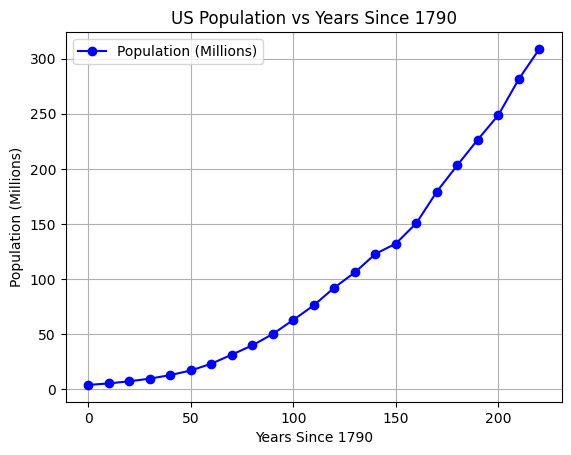

In [3]:
#Step 1(b): Plot the US population (in millions) versus the years since 1790.
import pandas as pd
import matplotlib.pyplot as plt

us_pop_data = pd.read_csv('us_pop_data.csv')

us_pop_data['years_since_1790'] = us_pop_data['year'] - 1790
us_pop_data['population_millions'] = us_pop_data['us_pop'] / 1_000_000

plt.plot(us_pop_data['years_since_1790'], us_pop_data['population_millions'],
         marker='o', linestyle='-', color='b', label='Population (Millions)')
plt.xlabel('Years Since 1790')
plt.ylabel('Population (Millions)')
plt.title('US Population vs Years Since 1790')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
#Step 1(c): Create a linear regression model to predict the US population (in millions) t years from 1790. Find and report the R2-value of this model.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

us_pop_data = pd.read_csv('us_pop_data.csv')

us_pop_data['years_since_1790'] = us_pop_data['year'] - 1790
us_pop_data['population_millions'] = us_pop_data['us_pop'] / 1_000_000

X = us_pop_data['years_since_1790'].values.reshape(-1, 1)
y = us_pop_data['population_millions']

linear_model = LinearRegression()
linear_model.fit(X, y)

y_pred = linear_model.predict(X)
r2_linear = r2_score(y, y_pred)

print("Linear Regression Coefficients:")
print(f"Slope (m): {linear_model.coef_[0]}")
print(f"Intercept (b): {linear_model.intercept_}")
print(f"R² value: {r2_linear}")

Linear Regression Coefficients:
Slope (m): 1.359624838043478
Intercept (b): -45.567876097826044
R² value: 0.9192437447080442


In [5]:
#Step 1(d): Create another new column in your data by squaring the number of years since 1790.
import pandas as pd

us_pop_data = pd.read_csv('us_pop_data.csv')

us_pop_data['years_since_1790'] = us_pop_data['year'] - 1790
us_pop_data['population_millions'] = us_pop_data['us_pop'] / 1_000_000
us_pop_data['years_squared'] = us_pop_data['years_since_1790'] ** 2

print(us_pop_data.head())

   year    us_pop  years_since_1790  population_millions  years_squared
0  1790   3929326                 0             3.929326              0
1  1800   5308483                10             5.308483            100
2  1810   7239881                20             7.239881            400
3  1820   9638453                30             9.638453            900
4  1830  12866020                40            12.866020           1600


In [6]:
#Step 1(e): Run another linear regression, where your input feature is the square of the number of years since 1790. Find and report the R2-value of this model.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

us_pop_data = pd.read_csv('us_pop_data.csv')

us_pop_data['years_since_1790'] = us_pop_data['year'] - 1790
us_pop_data['population_millions'] = us_pop_data['us_pop'] / 1_000_000
us_pop_data['years_squared'] = us_pop_data['years_since_1790'] ** 2

X_quadratic = us_pop_data[['years_since_1790', 'years_squared']]
y = us_pop_data['population_millions']

quadratic_model = LinearRegression()
quadratic_model.fit(X_quadratic, y)

y_pred_quadratic = quadratic_model.predict(X_quadratic)
r2_quadratic = r2_score(y, y_pred_quadratic)

print("Quadratic Regression Coefficients:")
print(f"Slope (years_since_1790): {quadratic_model.coef_[0]}")
print(f"Slope (years_squared): {quadratic_model.coef_[1]}")
print(f"Intercept (c): {quadratic_model.intercept_}")
print(f"R² value for Quadratic Model: {r2_quadratic}")

Quadratic Regression Coefficients:
Slope (years_since_1790): -0.13021122350931666
Slope (years_squared): 0.006771982097967249
Intercept (c): 6.576386056521756
R² value for Quadratic Model: 0.9990601474698976


R² Value for Linear Model: 0.9192437447080442
R² Value for Quadratic Model: 0.9990601474698976


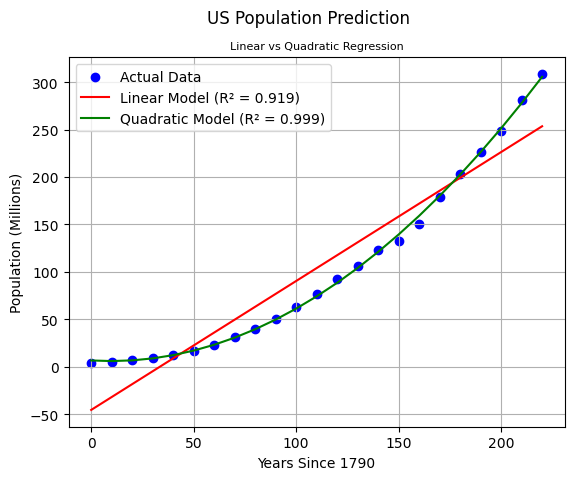

In [7]:
#Step 1(f): Plot the models you built on top of the data. Which one fits the data better? Is this apparent in your R2-values. Explain.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

us_pop_data = pd.read_csv('us_pop_data.csv')

us_pop_data['years_since_1790'] = us_pop_data['year'] - 1790
us_pop_data['population_millions'] = us_pop_data['us_pop'] / 1_000_000
us_pop_data['years_squared'] = us_pop_data['years_since_1790'] ** 2

X_linear = us_pop_data[['years_since_1790']]
y = us_pop_data['population_millions']

linear_model = LinearRegression()
linear_model.fit(X_linear, y)
y_pred_linear = linear_model.predict(X_linear)

X_quadratic = us_pop_data[['years_since_1790', 'years_squared']]

quadratic_model = LinearRegression()
quadratic_model.fit(X_quadratic, y)
y_pred_quadratic = quadratic_model.predict(X_quadratic)

r2_linear = r2_score(y, y_pred_linear)
r2_quadratic = r2_score(y, y_pred_quadratic)

print(f"R² Value for Linear Model: {r2_linear}")
print(f"R² Value for Quadratic Model: {r2_quadratic}")

plt.scatter(us_pop_data['years_since_1790'], us_pop_data['population_millions'], color='blue', label='Actual Data')
plt.plot(us_pop_data['years_since_1790'], y_pred_linear, color='red', label=f'Linear Model (R² = {r2_linear:.3f})')
plt.plot(us_pop_data['years_since_1790'], y_pred_quadratic, color='green', label=f'Quadratic Model (R² = {r2_quadratic:.3f})')
plt.xlabel('Years Since 1790')
plt.ylabel('Population (Millions)')
plt.suptitle('US Population Prediction')
plt.title('Linear vs Quadratic Regression', fontsize=8)
plt.legend()
plt.grid(True)
plt.show()

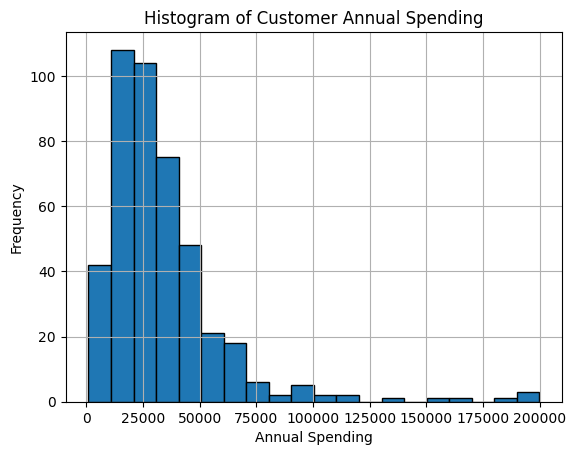

In [8]:
#Step 2(a): Make a histogram of the customer spending amounts.
import pandas as pd
import matplotlib.pyplot as plt

customer_spending = pd.read_csv('customer_spending.csv')

plt.hist(customer_spending['ann_spending'], bins=20, edgecolor='black')
plt.title('Histogram of Customer Annual Spending')
plt.xlabel('Annual Spending')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
#Step 2(b): Make a new data set that is a log transformation of the customer spending amounts.
import pandas as pd
import numpy as np

customer_spending = pd.read_csv('customer_spending.csv')

customer_spending['log_ann_spending'] = np.log(customer_spending['ann_spending'])

print(customer_spending.head())

   ann_spending  log_ann_spending
0         34112         10.437405
1         33266         10.412291
2         36610         10.508077
3         27381         10.217605
4         46100         10.738568


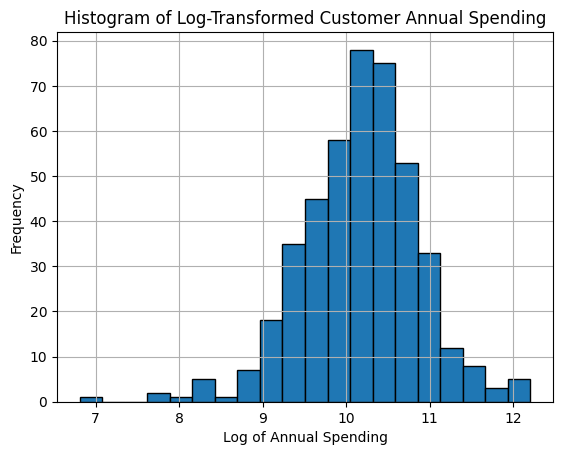

In [10]:
#Step 2(c): Make a histogram of the log transformed dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customer_spending = pd.read_csv('customer_spending.csv')

customer_spending['log_ann_spending'] = np.log(customer_spending['ann_spending'])

plt.hist(customer_spending['log_ann_spending'], bins=20, edgecolor='black')
plt.title('Histogram of Log-Transformed Customer Annual Spending')
plt.xlabel('Log of Annual Spending')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
## Step 2(d): Compare the two histograms. Discuss why it might be useful to apply a log transformation to this data for modeling purposes.
##The first histogram shows that the original customer spending data is heavily skewed to the right. The second histogram shows a normally distributed
##dataset, due to the log transformation. The log transformation is more suitable for regression modeling. 